Les transactions : Crop , Fertilizer.
Items : Temperature	, Humidity , Rainfall , Soil.

Discretiser la temperature 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

In [2]:
def load(f):
    dataset = pd.read_csv(f)
    return dataset
dataset = load("Dataset2.csv")
print(dataset)

      zcta  time_period  population  Start date    end date  case count  \
0    95129           32       39741  10/11/2020  10/31/2020        22.0   
1    95129           43       39741   5/30/2021   6/19/2021         NaN   
2    95129           40       39741   3/28/2021   4/17/2021        34.0   
3    95129           55       39741    2/6/2022   2/26/2022       110.0   
4    95129           44       39741   6/20/2021   7/10/2021        14.0   
..     ...          ...         ...         ...         ...         ...   
332  94085           59       23223       1-May      21-May       165.0   
333  94085           63       23223      24-Jul      13-Aug       150.0   
334  94085           61       23223      12-Jun       2-Jul       219.0   
335  94085           27       23223      28-Jun      18-Jul        53.0   
336  94085           57       23223      20-Mar       9-Apr        30.0   

     test count  positive tests  case rate  test rate  positivity rate  
0        2543.0           

In [3]:
# infos de base du dataset
def info_dataset(dataset):
    dataset.info()
    print(dataset.head())
    print(dataset.shape)
info_dataset(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zcta             337 non-null    int64  
 1   time_period      337 non-null    int64  
 2   population       337 non-null    int64  
 3   Start date       337 non-null    object 
 4   end date         337 non-null    object 
 5   case count       311 non-null    float64
 6   test count       325 non-null    float64
 7   positive tests   310 non-null    float64
 8   case rate        337 non-null    float64
 9   test rate        337 non-null    float64
 10  positivity rate  337 non-null    float64
dtypes: float64(6), int64(3), object(2)
memory usage: 29.1+ KB
    zcta  time_period  population  Start date    end date  case count  \
0  95129           32       39741  10/11/2020  10/31/2020        22.0   
1  95129           43       39741   5/30/2021   6/19/2021         NaN   
2  95129       

In [4]:
import re
def aff_nombres_manquants(dataset,attr):
    dataset_sorted=dataset.sort_values(by=attr)
    column=dataset_sorted[attr]
    manquant=0
    
    for i in column :
        if (pd.isna(i)):
            manquant+=1
    print("le nombre de valeurs manquantes est de :",manquant,"\nle pourcentage de valeurs manquantes est de:",manquant*100/len(dataset_sorted),'%')
for attr in dataset.columns:
    print('COLUMN:', attr)
    aff_nombres_manquants(dataset, attr)     

COLUMN: zcta
le nombre de valeurs manquantes est de : 0 
le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: time_period
le nombre de valeurs manquantes est de : 0 
le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: population
le nombre de valeurs manquantes est de : 0 
le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: Start date
le nombre de valeurs manquantes est de : 0 
le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: end date
le nombre de valeurs manquantes est de : 0 
le pourcentage de valeurs manquantes est de: 0.0 %
COLUMN: case count
le nombre de valeurs manquantes est de : 26 
le pourcentage de valeurs manquantes est de: 7.71513353115727 %
COLUMN: test count
le nombre de valeurs manquantes est de : 12 
le pourcentage de valeurs manquantes est de: 3.5608308605341246 %
COLUMN: positive tests
le nombre de valeurs manquantes est de : 27 
le pourcentage de valeurs manquantes est de: 8.011869436201781 %
COLUMN: case rate
le nombre de valeurs manquan

In [5]:
def centers(dataset, attr):
    # Sort dataset by given column
    dataset_sorted = dataset.sort_values(by=attr)
    # print(dataset_sorted)
    
    # Calculate moyenne
    avg = 0
    cpt = len(dataset_sorted)
    column = dataset_sorted[attr]
    # print("column: \n")
    # print(column)
    valid_count = 0
    
    for value in column:
        # Check the type of the value
        if not pd.isna(value) and value != '?':
            avg += float(value)
            valid_count += 1
    
    # Calculate the average only for valid numeric values
    avg = avg / valid_count if valid_count != 0 else 0
    
    # Calculate median
    if cpt % 2 == 0:  # pair
        idx1 = cpt // 2
        idx2 = (cpt // 2) - 1
        med = (column.iloc[idx1] + column.iloc[idx2]) / 2
    else:
        idx = cpt // 2
        med = column.iloc[idx]
    
    # Calculate mode
    # Count occurrences of each unique value
    counts = {}
    for value in column:
        # Check the type of the value
        if isinstance(value, (int, float)):
            counts[value] = counts.get(value, 0) + 1
    
    # Find the mode(s)
    mode_values = [key for key, value in counts.items() if value == max(counts.values())]
    
    if len(mode_values) == 1:
        # print('only one')
        mode = mode_values[0]
    else:
        # If multiple modes, return a tuple of modes
        # print('multiple')
        mode = tuple(mode_values)
        
    return avg, med, mode


In [6]:
for attr in dataset.columns:
    if attr != 'end date' and attr != 'Start date':
        print('COLUMN:', attr)
        avg, med, mode = centers(dataset,attr)
        # Check if avg = med = mode
        print('AVERAGE: ', avg, '...', 'MEDIAN: ', med, 'MODE: ', mode)
        if avg == med == mode:
            print("The average, median, and mode are equal. SYMMETRICAL")
        else:
            print("The average, median, and mode are not equal. NOT SYMMETRICAL")

COLUMN: zcta
AVERAGE:  94663.59643916914 ... MEDIAN:  95035 MODE:  (94085, 94086)
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: time_period
AVERAGE:  43.69436201780415 ... MEDIAN:  43 MODE:  (21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67)
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: population
AVERAGE:  50260.548961424334 ... MEDIAN:  50477 MODE:  (23223, 50477)
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: case count
AVERAGE:  225.9871382636656 ... MEDIAN:  104.0 MODE:  0.0
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: test count
AVERAGE:  4938.116923076923 ... MEDIAN:  4474.0 MODE:  (1295.0, 2251.0, 2497.0, 2747.0, 6659.0)
The average, median, and mode are not equal. NOT SYMMETRICAL
COLUMN: positive tests
AVERAGE:  380.1967741935484 ... MEDIAN:  126.0 MODE: 

In [7]:
def quartiles(dataset, attr):
    dataset_sorted = dataset.sort_values(by=attr)
    
    n = len(dataset_sorted)
    
    # Convert the column to numeric, coercing errors to NaN
    column = pd.to_numeric(dataset_sorted[attr], errors='coerce')
    # print(column)
    
    q0 = column.iloc[0]
    # q4 = column.iloc[-1]
    # q4_values = column.dropna().values  # Drop NaN values before selecting last element
    # q4 = q4_values[-1] if len(q4_values) > 0 else None  # Set q4 to None if there are no valid values
    q4 = column.max()
    
    # Calculate q2
    x, q2, _ = centers(dataset, attr)
    
    # calculate q1
    if n % 4 == 0:  # if divisible by 4 --> 1/4
        q1_idx1 = n // 4
        q1_idx2 = (n // 4) - 1
        q1 = (column.iloc[q1_idx1] + column.iloc[q1_idx2]) / 2
    else:
        q1_idx = n // 4
        q1 = column.iloc[q1_idx]
    
    # calculate q3
    if (3 * n) % 4 == 0:  # if 3 * n is divisible by 4 --> 3/4
        q3_idx1 = (3 * n) // 4
        q3_idx2 = ((3 * n) // 4) - 1
        q3 = (column.iloc[q3_idx1] + column.iloc[q3_idx2]) / 2
    else:
        q3_idx = (3 * n) // 4
        q3 = column.iloc[q3_idx]
    
    return q0, q1, q2, q3, q4

for attr in dataset.columns:
    if attr != 'end date' and attr != 'Start date':
        print('COLUMN:', attr)
        q0, q1, q2, q3, q4 = quartiles(dataset, attr)
        print('q0: ', q0)
        print('q1: ', q1)
        print('q2: ', q2)
        print('q3: ', q3)
        print('q4: ', q4)


COLUMN: zcta
q0:  94085
q1:  94086
q2:  95035
q3:  95128
q4:  95129
COLUMN: time_period
q0:  18
q1:  31
q2:  43
q3:  56
q4:  155
COLUMN: population
q0:  23223
q1:  36975
q2:  50477
q3:  66256
q4:  79655
COLUMN: case count
q0:  0.0
q1:  42.0
q2:  104.0
q3:  316.0
q4:  3627.0
COLUMN: test count
q0:  11.0
q1:  2438.0
q2:  4474.0
q3:  6948.0
q4:  20177.0
COLUMN: positive tests
q0:  11.0
q1:  52.0
q2:  126.0
q3:  387.0
q4:  35000.0
COLUMN: case rate
q0:  0.0
q1:  3.3
q2:  8.1
q3:  19.1
q4:  260.7
COLUMN: test rate
q0:  0.1
q1:  249.7
q2:  427.1
q3:  614.9
q4:  1615.1
COLUMN: positivity rate
q0:  0.0
q1:  1.3
q2:  3.0
q3:  6.6
q4:  100.0


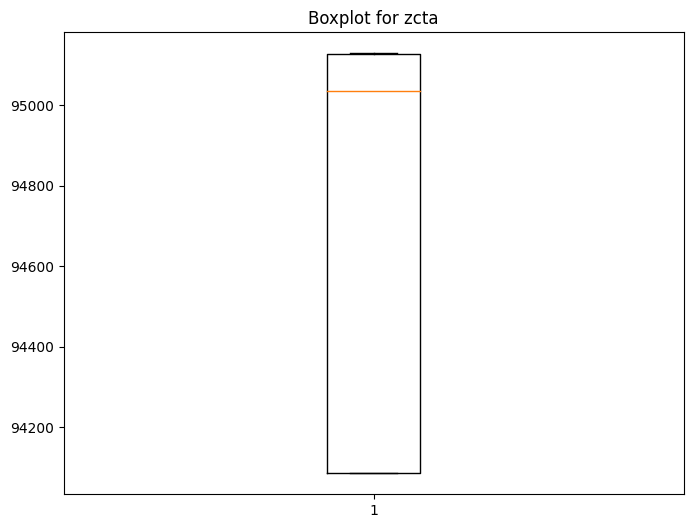

Aberrant values in column time_period are 155


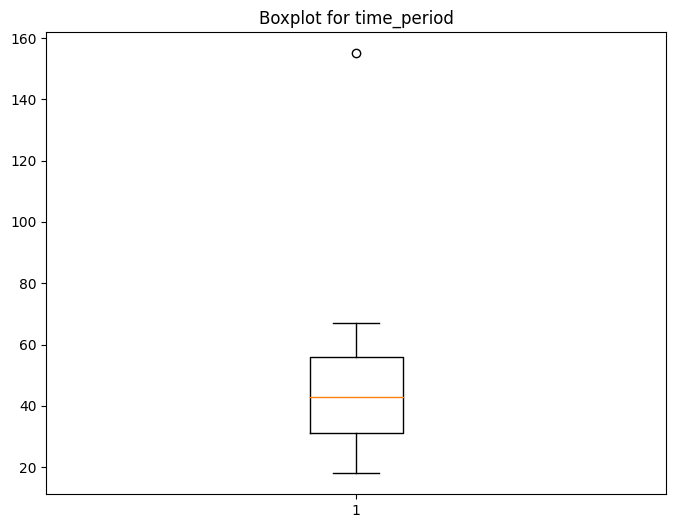

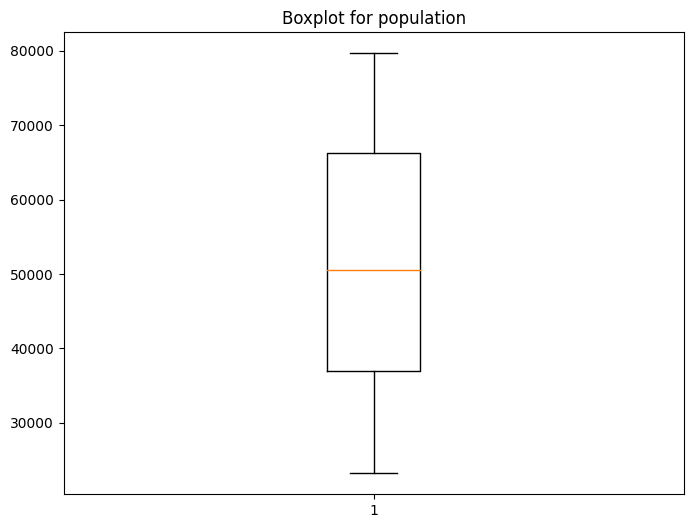

Aberrant values in column case count are 1285.0
Aberrant values in column case count are 1079.0
Aberrant values in column case count are 1617.0
Aberrant values in column case count are 1465.0
Aberrant values in column case count are 3627.0
Aberrant values in column case count are 1477.0
Aberrant values in column case count are 1211.0
Aberrant values in column case count are 728.0
Aberrant values in column case count are 2265.0
Aberrant values in column case count are 1606.0
Aberrant values in column case count are 928.0
Aberrant values in column case count are 737.0
Aberrant values in column case count are 837.0
Aberrant values in column case count are 3202.0
Aberrant values in column case count are 899.0
Aberrant values in column case count are 807.0
Aberrant values in column case count are 763.0
Aberrant values in column case count are 860.0
Aberrant values in column case count are 1659.0
Aberrant values in column case count are 944.0
Aberrant values in column case count are 1347.0
A

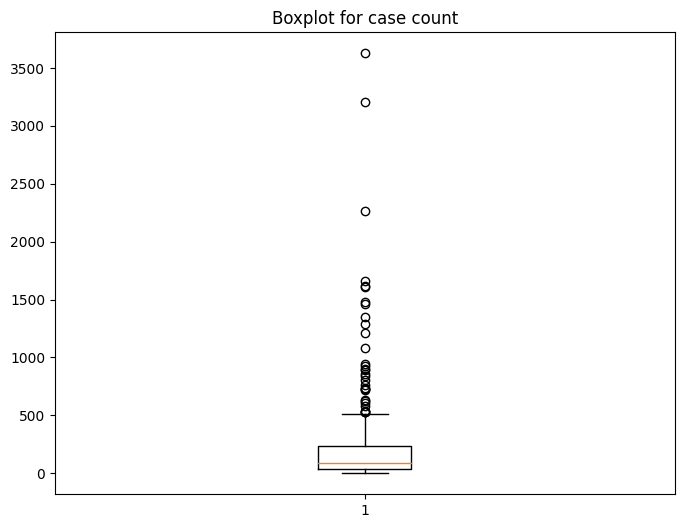

Aberrant values in column test count are 17974.0
Aberrant values in column test count are 16825.0
Aberrant values in column test count are 17383.0
Aberrant values in column test count are 15599.0
Aberrant values in column test count are 19134.0
Aberrant values in column test count are 19888.0
Aberrant values in column test count are 20177.0
Aberrant values in column test count are 13726.0
Aberrant values in column test count are 18000.0
Aberrant values in column test count are 16561.0


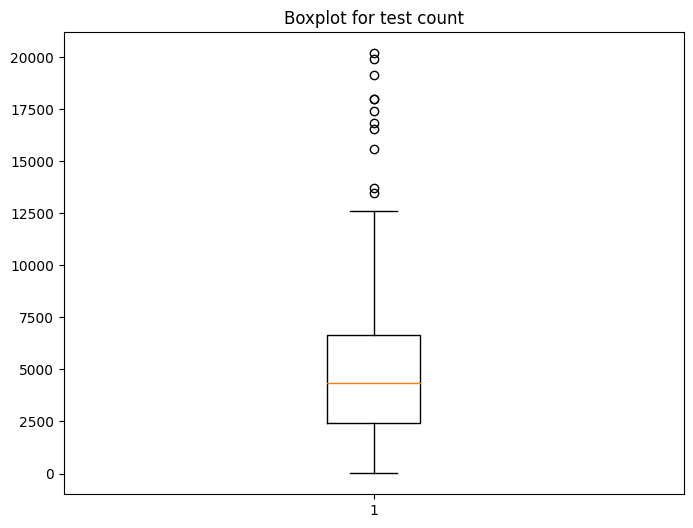

Aberrant values in column positive tests are 1451.0
Aberrant values in column positive tests are 1469.0
Aberrant values in column positive tests are 1841.0
Aberrant values in column positive tests are 1633.0
Aberrant values in column positive tests are 4061.0
Aberrant values in column positive tests are 1668.0
Aberrant values in column positive tests are 1348.0
Aberrant values in column positive tests are 2905.0
Aberrant values in column positive tests are 2067.0
Aberrant values in column positive tests are 1149.0
Aberrant values in column positive tests are 950.0
Aberrant values in column positive tests are 3619.0
Aberrant values in column positive tests are 1069.0
Aberrant values in column positive tests are 910.0
Aberrant values in column positive tests are 35000.0
Aberrant values in column positive tests are 1117.0
Aberrant values in column positive tests are 1951.0
Aberrant values in column positive tests are 1190.0
Aberrant values in column positive tests are 1523.0
Aberrant valu

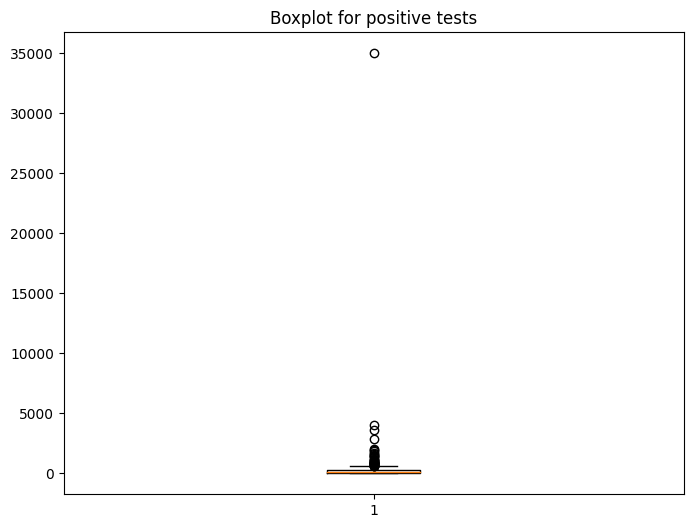

Aberrant values in column case rate are 74.8
Aberrant values in column case rate are 61.3
Aberrant values in column case rate are 54.6
Aberrant values in column case rate are 154.0
Aberrant values in column case rate are 52.5
Aberrant values in column case rate are 61.7
Aberrant values in column case rate are 48.6
Aberrant values in column case rate are 48.9
Aberrant values in column case rate are 139.0
Aberrant values in column case rate are 52.7
Aberrant values in column case rate are 81.7
Aberrant values in column case rate are 68.4
Aberrant values in column case rate are 208.2
Aberrant values in column case rate are 105.3
Aberrant values in column case rate are 52.3
Aberrant values in column case rate are 260.7
Aberrant values in column case rate are 106.2
Aberrant values in column case rate are 87.0
Aberrant values in column case rate are 52.3
Aberrant values in column case rate are 162.8
Aberrant values in column case rate are 51.4
Aberrant values in column case rate are 96.0
Abe

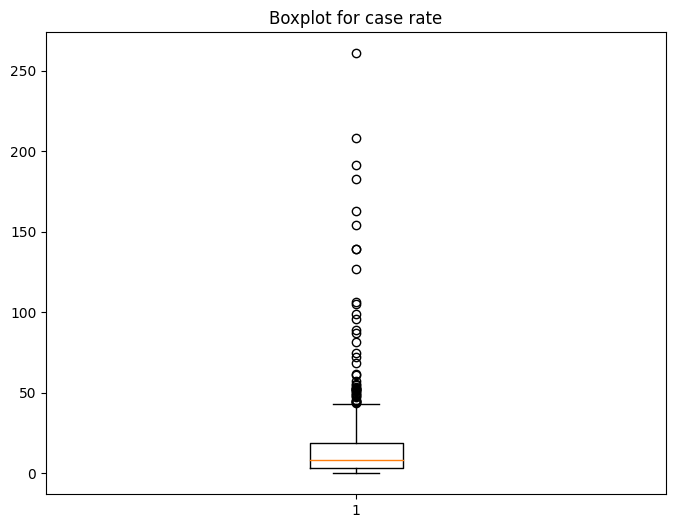

Aberrant values in column test rate are 1221.5
Aberrant values in column test rate are 1615.1
Aberrant values in column test rate are 1475.3
Aberrant values in column test rate are 1178.5
Aberrant values in column test rate are 1280.3
Aberrant values in column test rate are 1391.0
Aberrant values in column test rate are 1453.9
Aberrant values in column test rate are 1291.8
Aberrant values in column test rate are 1209.2
Aberrant values in column test rate are 1188.9
Aberrant values in column test rate are 1206.2
Aberrant values in column test rate are 1512.6
Aberrant values in column test rate are 1391.6
Aberrant values in column test rate are 1205.7


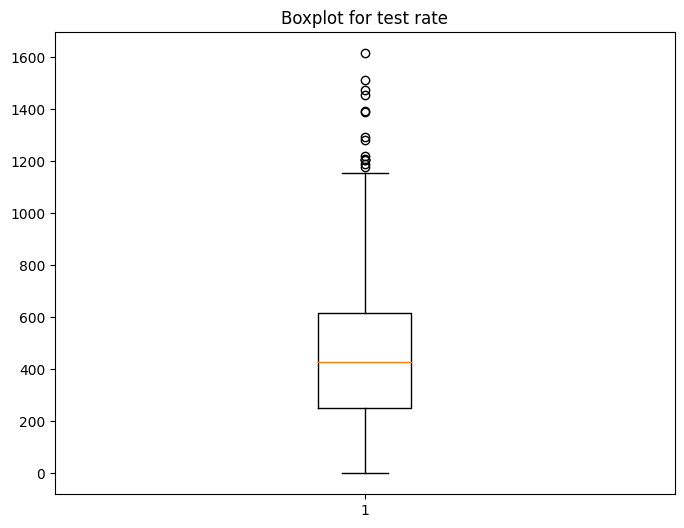

Aberrant values in column positivity rate are 15.4
Aberrant values in column positivity rate are 66.7
Aberrant values in column positivity rate are 28.6
Aberrant values in column positivity rate are 16.3
Aberrant values in column positivity rate are 17.7
Aberrant values in column positivity rate are 17.3
Aberrant values in column positivity rate are 16.8
Aberrant values in column positivity rate are 22.6
Aberrant values in column positivity rate are 26.3
Aberrant values in column positivity rate are 64.5
Aberrant values in column positivity rate are 17.3
Aberrant values in column positivity rate are 19.3
Aberrant values in column positivity rate are 15.0
Aberrant values in column positivity rate are 26.3
Aberrant values in column positivity rate are 18.2
Aberrant values in column positivity rate are 16.9
Aberrant values in column positivity rate are 16.0
Aberrant values in column positivity rate are 27.3
Aberrant values in column positivity rate are 37.5
Aberrant values in column posit

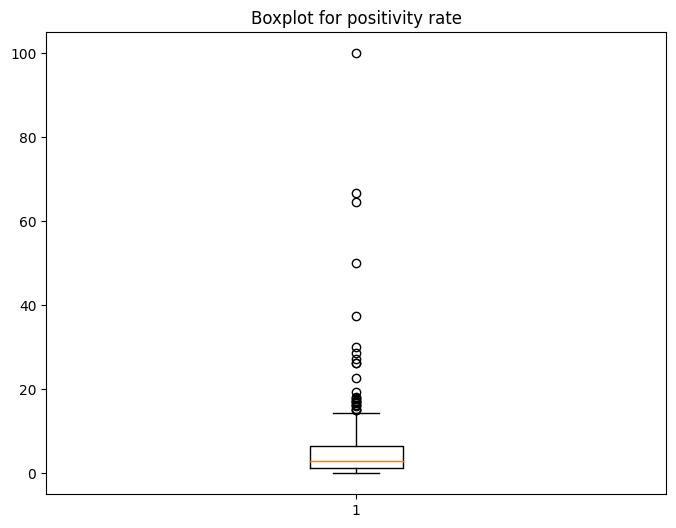

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

def box(dataset, attr):
    # Convert the data to numeric and create the histogram
    data = dataset[attr].apply(pd.to_numeric, errors='coerce').dropna()
    q0, q1, q2, q3, q4 = quartiles(dataset, attr)
    val = 1.5 * (q3 - q1)
    upper = q3 + val
    lower = q1 - val
    for value in data:
        if (value < lower) or (value > upper):
            print("Aberrant values in column", attr, "are", value)

    # Create a boxplot for the attribute
    plt.figure(figsize=(8, 6))
    plt.title(f"Boxplot for {attr}")
    plt.boxplot(data)
    plt.show()  # Show the boxplot for each attribute

for attr in dataset.columns:
    if attr != 'end date' and attr != 'Start date':
        box(dataset, attr)

In [9]:
import pandas as pd
import numpy as np
import re


def replace_missing(dataset, attr):
    # Replace NaN with the mean of the column
    mean_value = dataset[attr].astype(float).mean()
    dataset[attr] = dataset[attr].astype(float).fillna(mean_value)

    # Verify the changes
    return dataset

# Use the original dataset to verify changes
for attr in dataset.columns:
    if attr != 'end date' and attr != 'Start date':
        dataset = replace_missing(dataset.copy(), attr)  # Use copy to avoid modifying the original dataset
print(dataset)

for attr in dataset.columns:
    print('COLUMN:', attr)
    aff_nombres_manquants(dataset, attr)


        zcta  time_period  population  Start date    end date  case count  \
0    95129.0         32.0     39741.0  10/11/2020  10/31/2020   22.000000   
1    95129.0         43.0     39741.0   5/30/2021   6/19/2021  225.987138   
2    95129.0         40.0     39741.0   3/28/2021   4/17/2021   34.000000   
3    95129.0         55.0     39741.0    2/6/2022   2/26/2022  110.000000   
4    95129.0         44.0     39741.0   6/20/2021   7/10/2021   14.000000   
..       ...          ...         ...         ...         ...         ...   
332  94085.0         59.0     23223.0       1-May      21-May  165.000000   
333  94085.0         63.0     23223.0      24-Jul      13-Aug  150.000000   
334  94085.0         61.0     23223.0      12-Jun       2-Jul  219.000000   
335  94085.0         27.0     23223.0      28-Jun      18-Jul   53.000000   
336  94085.0         57.0     23223.0      20-Mar       9-Apr   30.000000   

     test count  positive tests  case rate  test rate  positivity rate  
0 

below:  92523.0
above:  96691.0


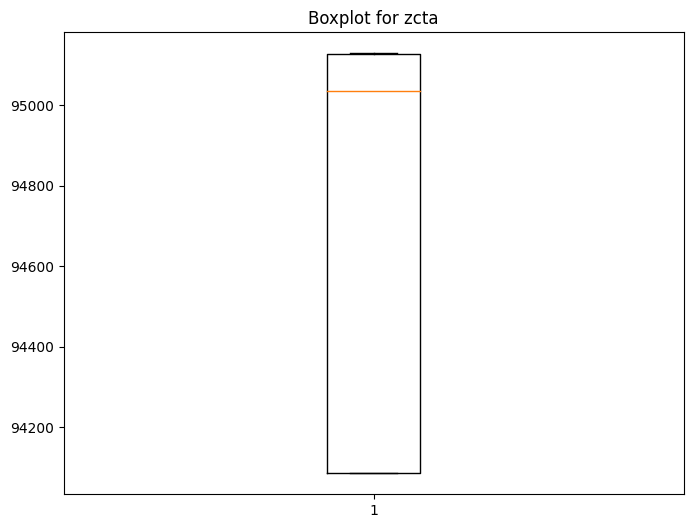

below:  -6.5
above:  93.5


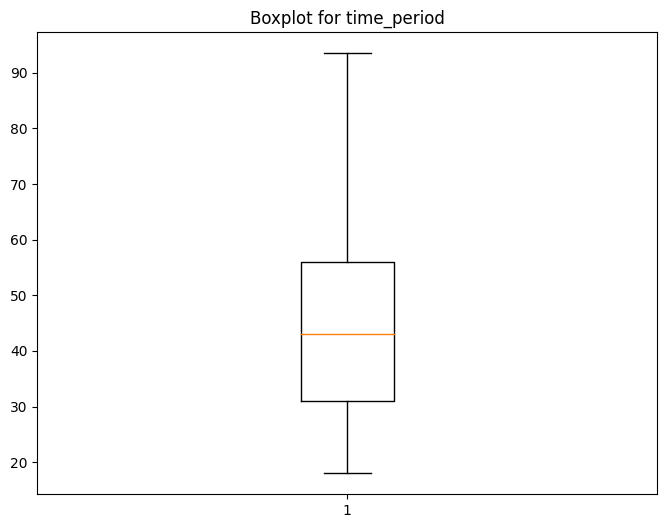

below:  -6946.5
above:  110177.5


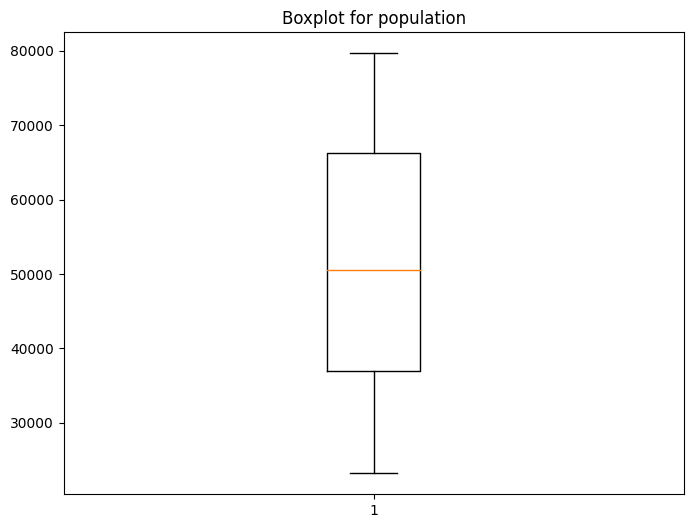

below:  -233.98070739549837
above:  501.96784565916397


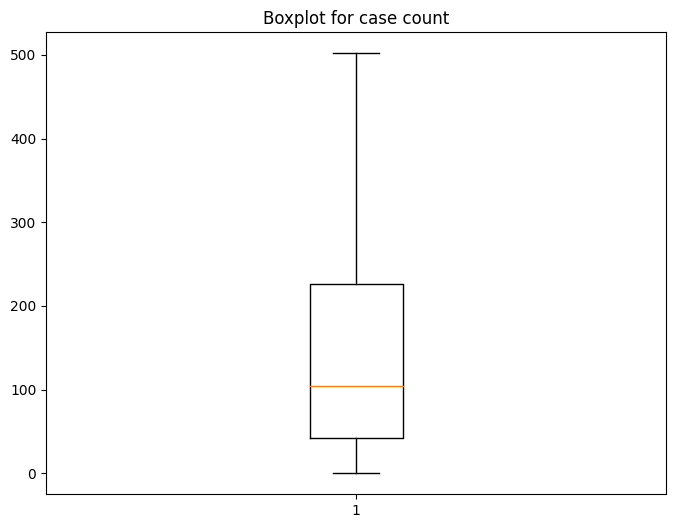

below:  -3746.5
above:  12745.5


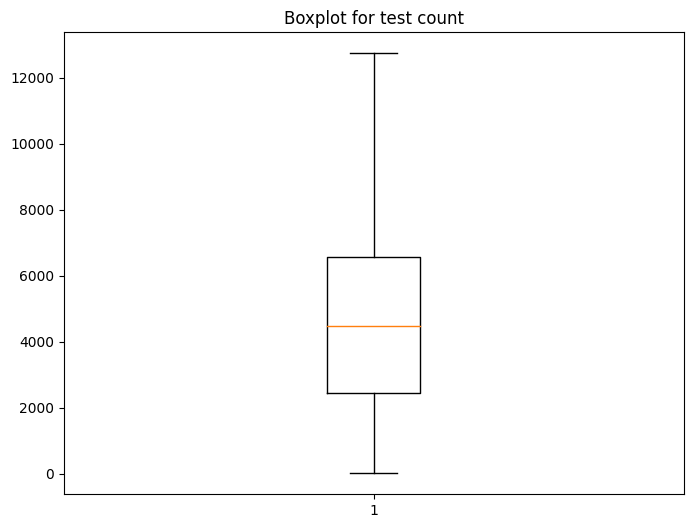

below:  -440.29516129032254
above:  872.491935483871


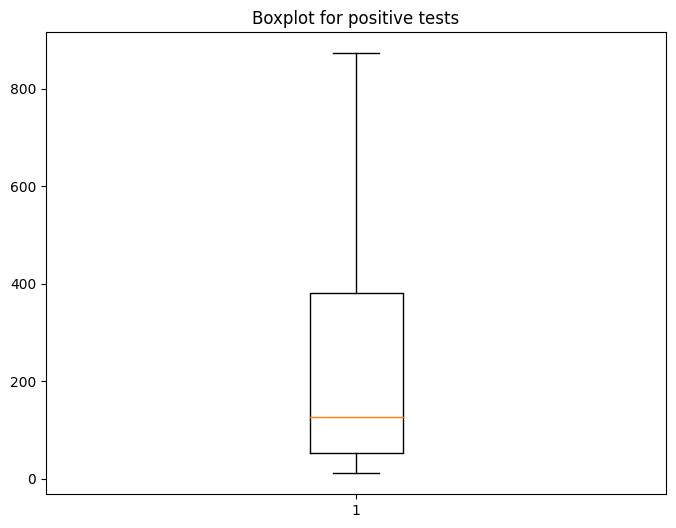

below:  -20.400000000000002
above:  42.800000000000004


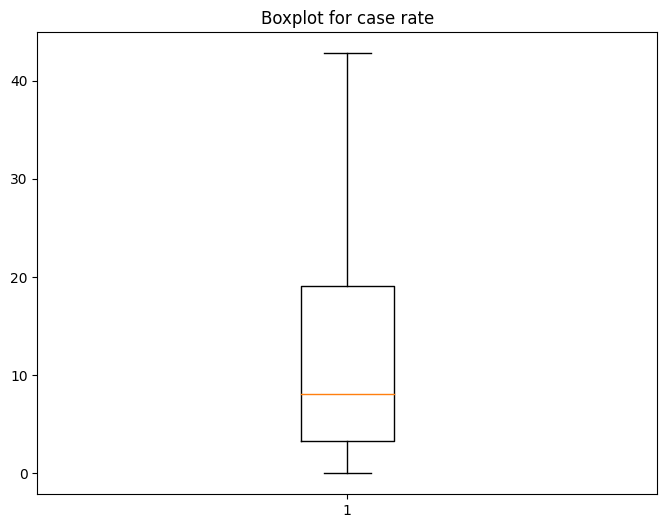

below:  -298.09999999999997
above:  1162.6999999999998


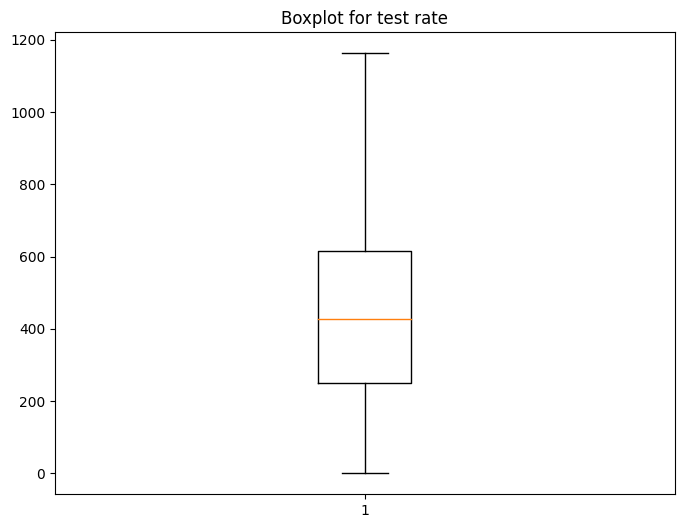

below:  -6.6499999999999995
above:  14.549999999999999


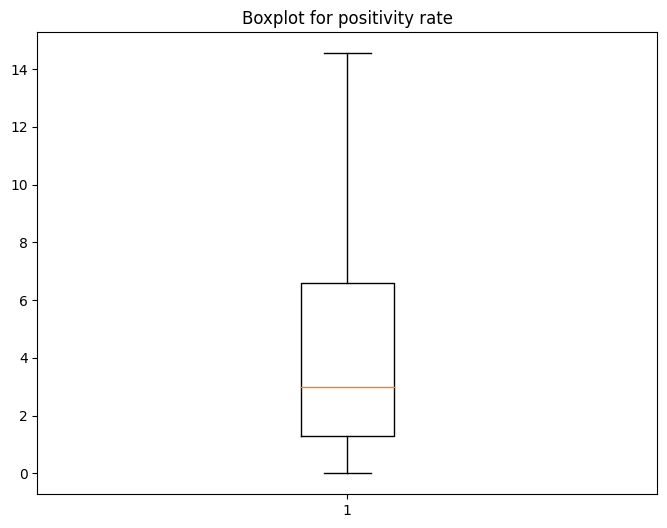

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def box_treat_outliers(dataset, attr):
    x = dataset[attr].copy()  # Make a copy of the column
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    val = 1.5 * (q3 - q1)
    below_q1 = q1 - val
    print('below: ', below_q1.astype(x.dtype))
    above_q3 = q3 + val
    print('above: ', above_q3.astype(x.dtype))
    
    # Replace outliers with below_q1 or above_q3
    x.loc[x < below_q1] = below_q1.astype(x.dtype)
    x.loc[x > above_q3] = above_q3.astype(x.dtype)
    
    dataset[attr] = x
    return dataset

# Assuming dataset is already defined
for attr in dataset.columns:
    if attr != 'end date' and attr != 'Start date':
        # box(dataset, attr)
        dataset = box_treat_outliers(dataset, attr)
        box(dataset, attr)
        # plt.show()  # Display the box plot for each attribute


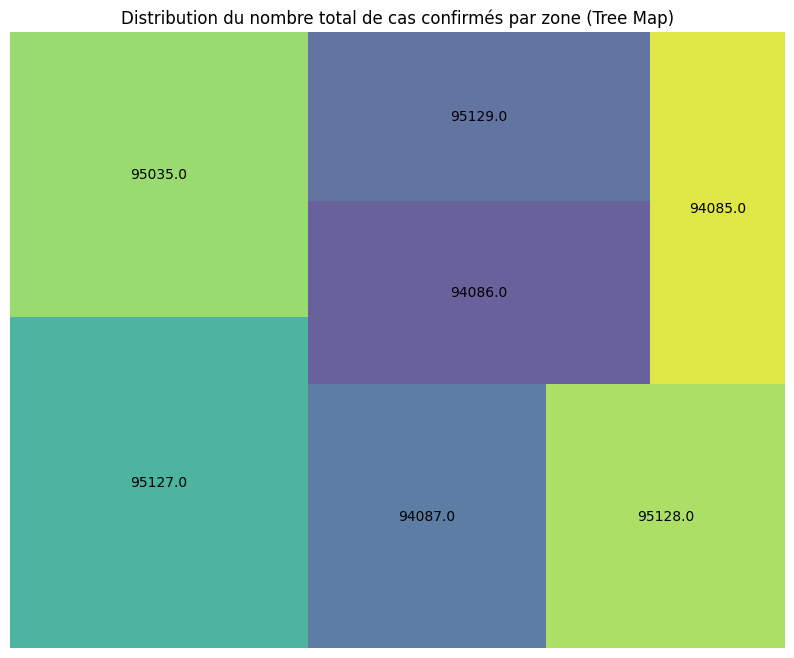

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\1563052416.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zcta', y='case count', data=total_df, palette='viridis')


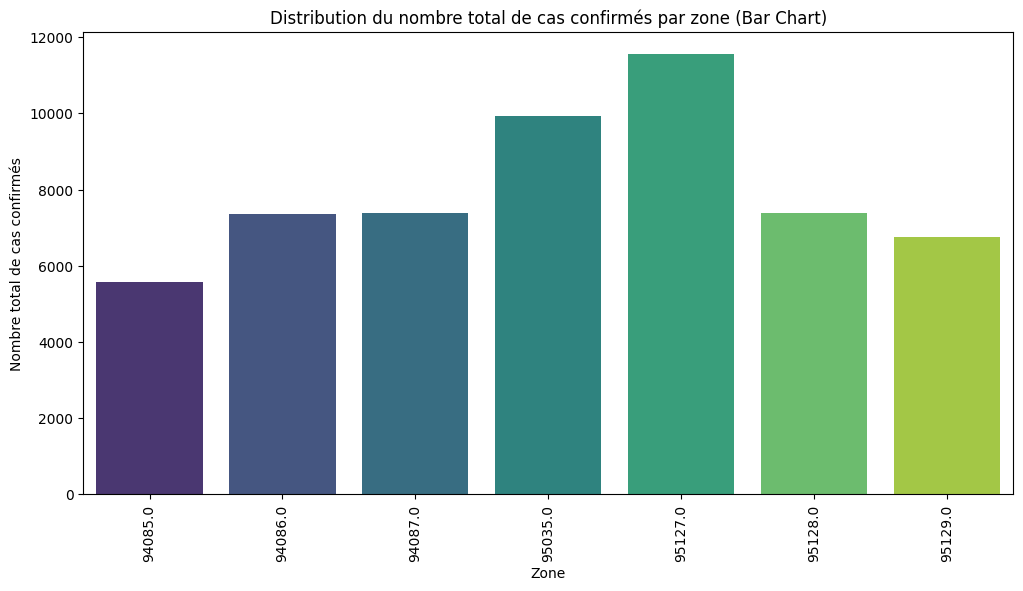

In [11]:
# La distribution du nombre total des cas confirmés et tests positifs par zones (Indication :
# Tree Map/Bar chart)

import matplotlib.pyplot as plt
import seaborn as sns
import squarify

total_df = dataset.groupby('zcta')[['case count', 'positive tests']].sum().reset_index()

# Triez le DataFrame par le total des cas confirmés
total_df = total_df.sort_values(by='case count', ascending=False)

# Tree Map
plt.figure(figsize=(10, 8))
squarify.plot(sizes=total_df['case count'], label=total_df['zcta'], alpha=0.8)
plt.title('Distribution du nombre total de cas confirmés par zone (Tree Map)')
plt.axis('off')
plt.show()

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(x='zcta', y='case count', data=total_df, palette='viridis')
plt.title('Distribution du nombre total de cas confirmés par zone (Bar Chart)')
plt.xlabel('Zone')
plt.ylabel('Nombre total de cas confirmés')
plt.xticks(rotation=90)
plt.show()

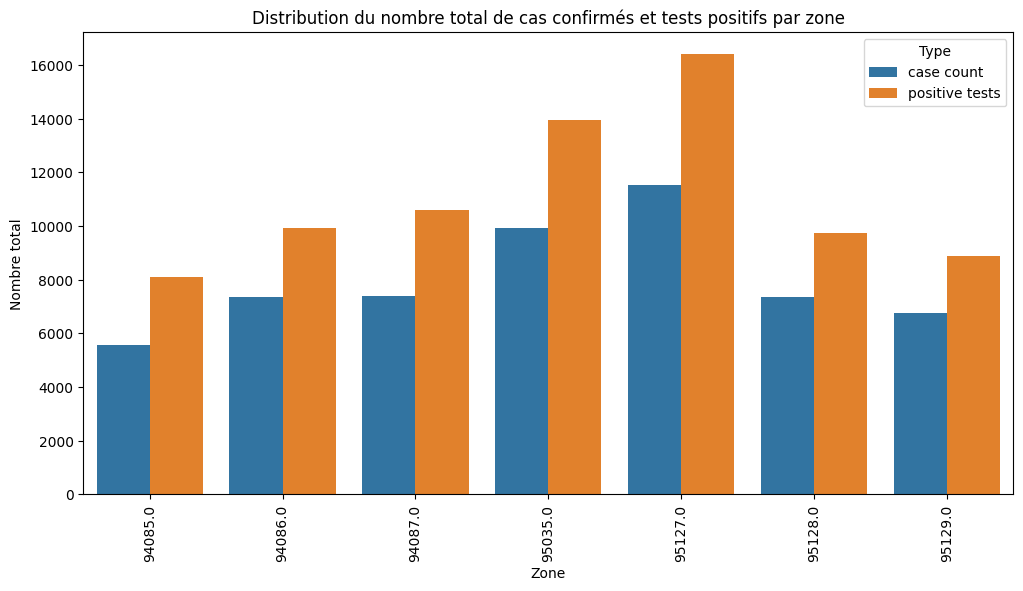

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def case_by_zone(dataset):
    # Assuming you have already imported pandas and loaded your data into the 'df' DataFrame

    # Create a new DataFrame with the total cases and positive tests per zone
    total_df = dataset.groupby('zcta')[['case count', 'positive tests']].sum().reset_index()

    # Sort the DataFrame by the total cases
    total_df = total_df.sort_values(by='case count', ascending=False)

    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Use seaborn's barplot to create a grouped bar chart
    sns.barplot(x='zcta', y='value', hue='variable', data=pd.melt(total_df, id_vars=['zcta'], value_vars=['case count', 'positive tests']))

    # Add labels and title
    plt.title('Distribution du nombre total de cas confirmés et tests positifs par zone')
    plt.xlabel('Zone')
    plt.ylabel('Nombre total')
    plt.xticks(rotation=90)

    # Show the legend
    plt.legend(title='Type')

    # Show the plot
    plt.show()
case_by_zone(dataset)

In [13]:
import pandas as pd
from datetime import datetime

def convert_date(date_str):
    formats_to_try = ["%b-%d", "%m/%d/%Y", "%d-%b", "%d-%b-%Y", "%d-%b-%y", "%d-%b-%Y"]
    
    for date_format in formats_to_try:
        try:
            date_obj = datetime.strptime(date_str, date_format)
            # If the format is "%b-%d", add the year 2023
            if "%b" in date_format:
                date_obj = date_obj.replace(year=2023)
            formatted_date = date_obj.strftime("%m/%d/%Y")
            return formatted_date
        except ValueError:
            continue
    
    # If none of the formats match, return the original string
    return date_str

# Example usage:
# dataset = pd.DataFrame({'Start date': ['10/11/2020', '5/30/2021', '3/28/2021', 'feb-25', '6/20/2021', '1-May', '24-Jul', '12-Jun', '28-Jun', '20-Mar']})

# Apply the convert_date function to the 'Start date' column
dataset['Start date'] = dataset['Start date'].apply(convert_date)
dataset['end date'] = dataset['end date'].apply(convert_date)

# Display the modified DataFrame
print(dataset['Start date'])
print(dataset['end date'])


0      10/11/2020
1      05/30/2021
2      03/28/2021
3      02/06/2022
4      06/20/2021
          ...    
332    05/01/2023
333    07/24/2023
334    06/12/2023
335    06/28/2023
336    03/20/2023
Name: Start date, Length: 337, dtype: object
0      10/31/2020
1      06/19/2021
2      04/17/2021
3      02/26/2022
4      07/10/2021
          ...    
332    05/21/2023
333    08/13/2023
334    07/02/2023
335    07/18/2023
336    04/09/2023
Name: end date, Length: 337, dtype: object


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\1961327153.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])


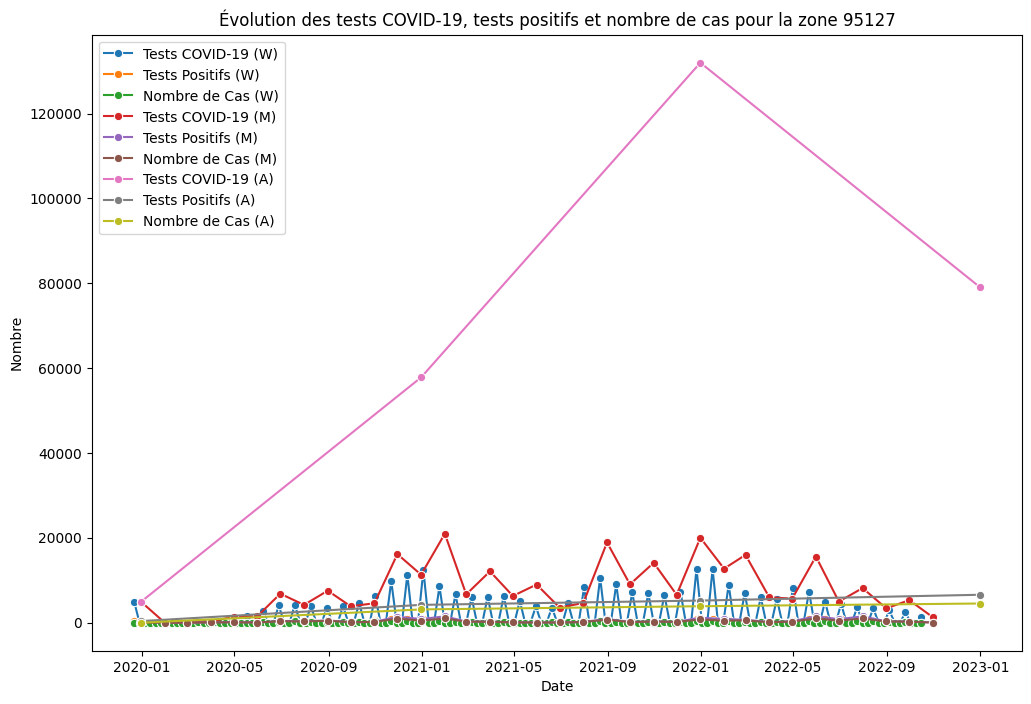

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\1961327153.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])


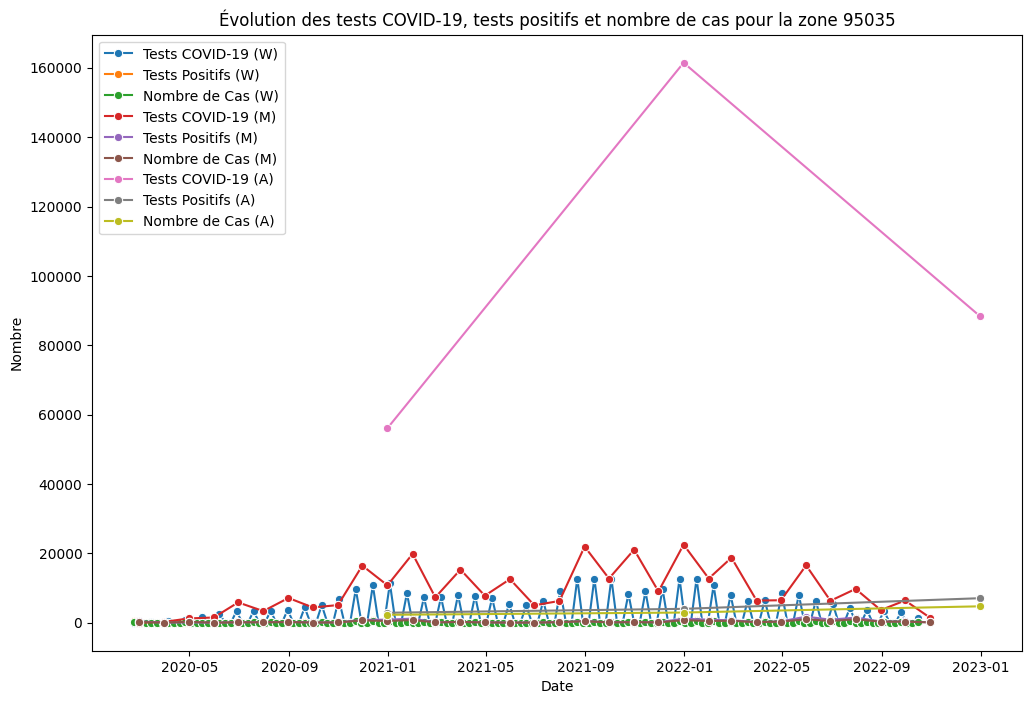

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\1961327153.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])


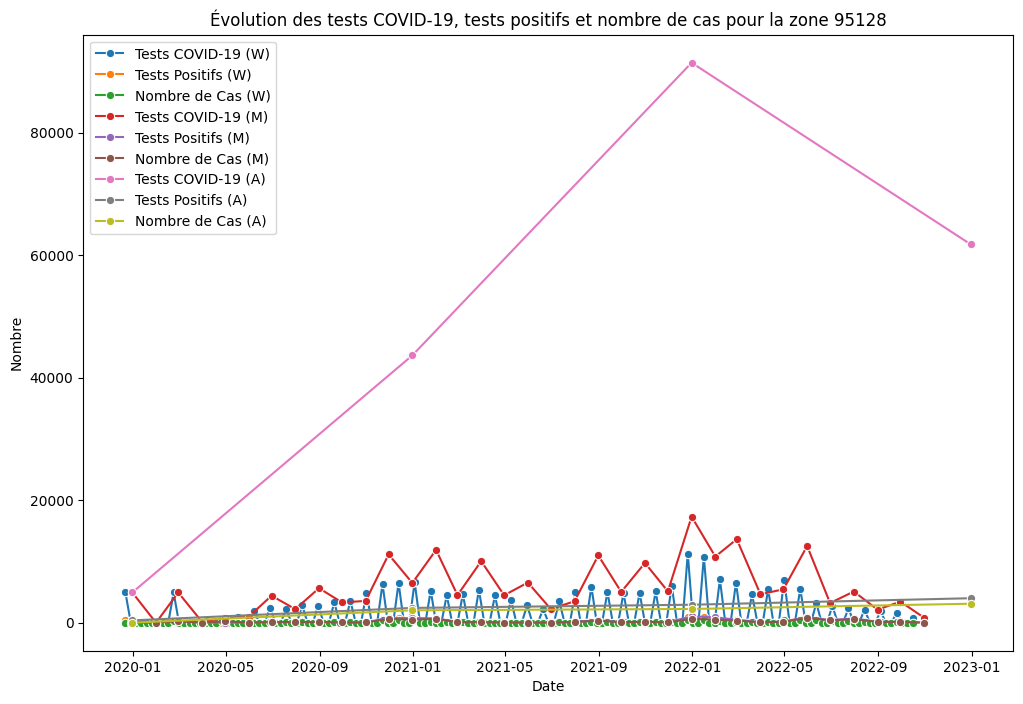

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\1961327153.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])


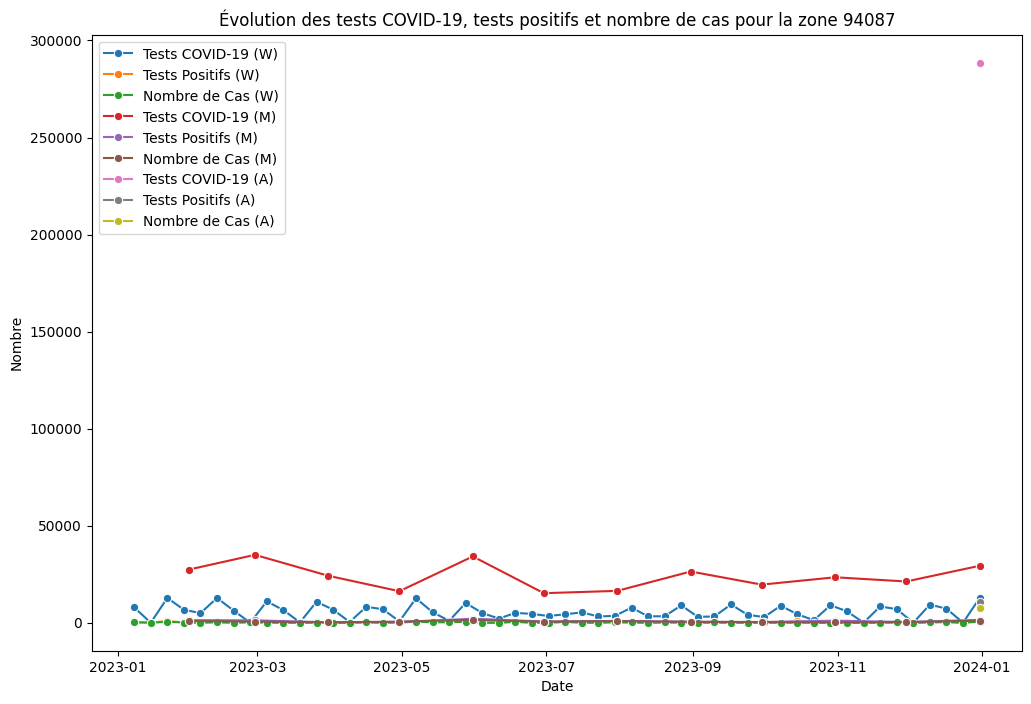

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\1961327153.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])


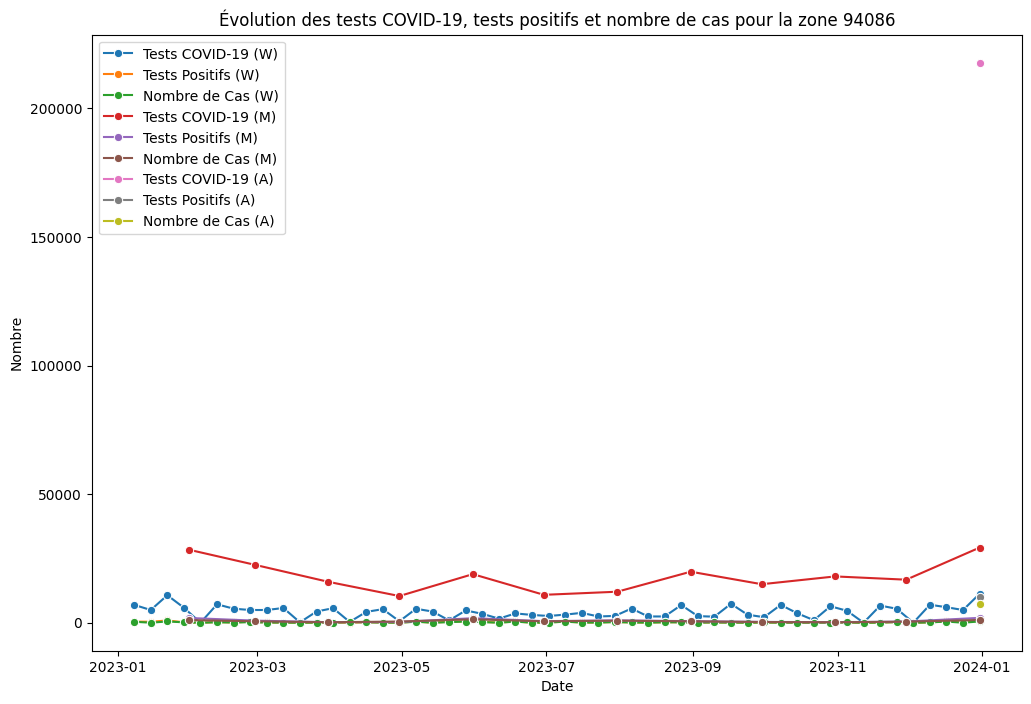

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\1961327153.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])


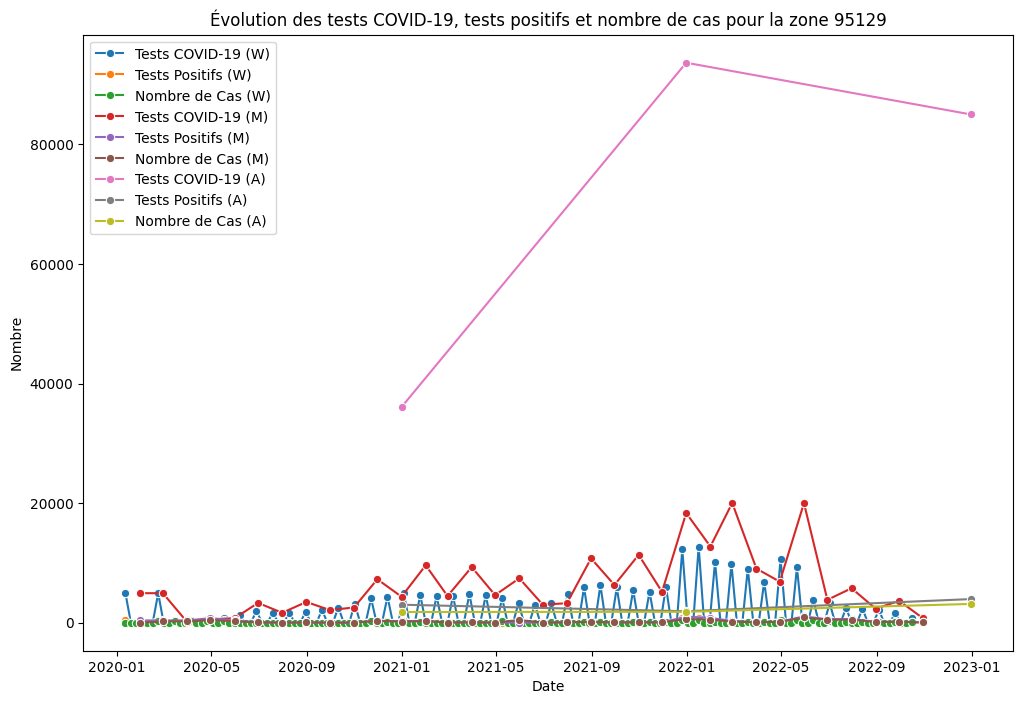

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\1961327153.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])


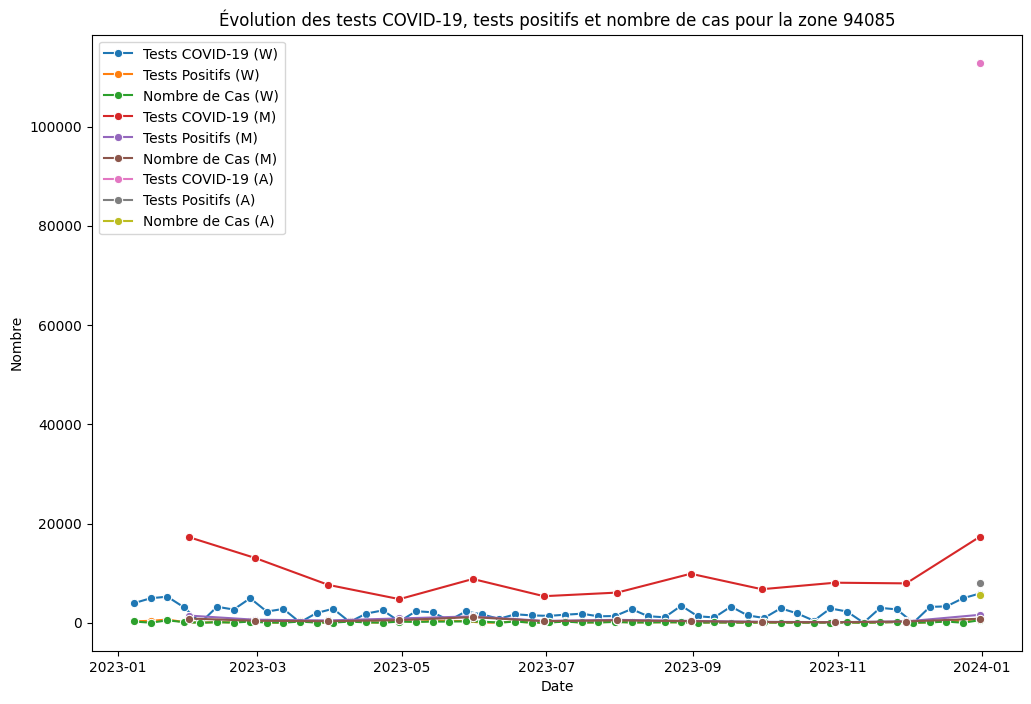

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def zone_by_time(dataset, zone):
    # Replace 'NomDeVotreZone' with the name of the zone you want to analyze
    zone_choisie = zone

    # Select data for the chosen zone
    zone_data = dataset[dataset['zcta'] == zone_choisie]
    # print(zone_data)

    # Convert the 'Start date' column to datetime
    zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])
    # print(zone_data['Start date'])

    # Choose the aggregation period (weekly, monthly, yearly)
    periods = ['W', 'M', 'A']

    # Create a line chart for each period
    plt.figure(figsize=(12, 8))

    for period in periods:
        # Aggregate data by the specified period using the resample function
        agg_data = zone_data.set_index('Start date').resample(period).agg({
            'test count': 'sum',
            'positive tests': 'sum',
            'case count': 'sum'
        }).reset_index()

        # Check if there are enough data points for the current period
        if len(agg_data) > 0:
            # Line Chart
            sns.lineplot(x='Start date', y='test count', data=agg_data, label=f'Tests COVID-19 ({period})', marker='o')
            sns.lineplot(x='Start date', y='positive tests', data=agg_data, label=f'Tests Positifs ({period})', marker='o')
            sns.lineplot(x='Start date', y='case count', data=agg_data, label=f'Nombre de Cas ({period})', marker='o')

    # Add labels and a title
    plt.title(f'Évolution des tests COVID-19, tests positifs et nombre de cas pour la zone {zone_choisie}')
    plt.xlabel('Date')
    plt.ylabel('Nombre')
    plt.legend()
    plt.show()
zone_by_time(dataset, 95127)
zone_by_time(dataset, 95035)
zone_by_time(dataset, 95128)
zone_by_time(dataset, 94087)
zone_by_time(dataset, 94086)
zone_by_time(dataset, 95129)
zone_by_time(dataset, 94085)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\2601551125.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='positive tests', hue='zcta', data=dataset, estimator=sum, ci=None)


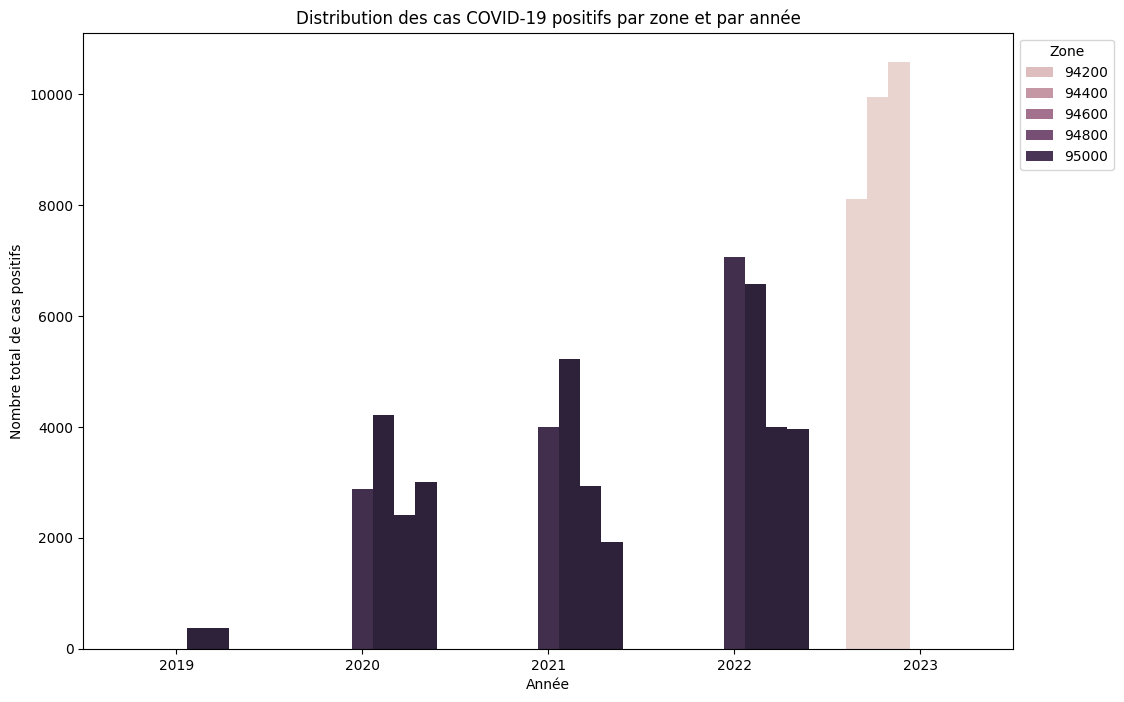

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Comment les cas covid positifs sont distribués par zone et par année ? (Indication : Stacked
# Bar chart)

def visualisation_3():

    # Convertir la colonne 'Start date' en datetime si ce n'est pas déjà fait
    dataset['Start date'] = pd.to_datetime(dataset['Start date'], errors='coerce')

    # Extraire l'année de la colonne 'Start date'
    dataset['Year'] = dataset['Start date'].dt.year
    

    # Créer un graphique à barres empilées (stacked bar chart)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Year', y='positive tests', hue='zcta', data=dataset, estimator=sum, ci=None)
    plt.title('Distribution des cas COVID-19 positifs par zone et par année')
    plt.xlabel('Année')
    plt.ylabel('Nombre total de cas positifs')
    plt.legend(title='Zone', bbox_to_anchor=(1, 1), loc='upper left')

    # Afficher le graphique
    plt.show()

visualisation_3()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\1612976788.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='population', y='test count', data=dataset,palette='viridis', s=100)


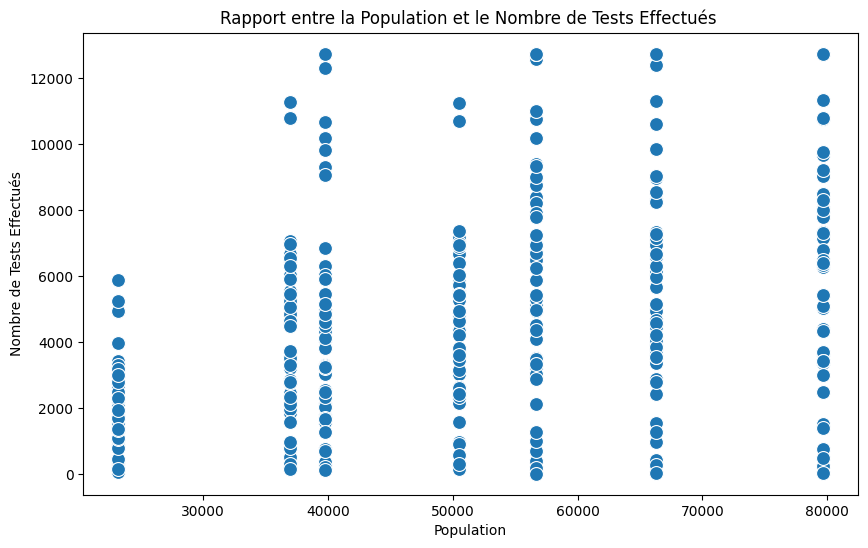

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualisation_4_1():
    # Créer un graphique de dispersion
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='population', y='test count', data=dataset,palette='viridis', s=100)
    plt.title('Rapport entre la Population et le Nombre de Tests Effectués ')
    plt.xlabel('Population')
    plt.ylabel('Nombre de Tests Effectués')
   

    # Afficher le graphique
    plt.show()

visualisation_4_1()


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18948\1725361371.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zcta', y='Rapport Population/Test', data=dataset, palette='viridis')


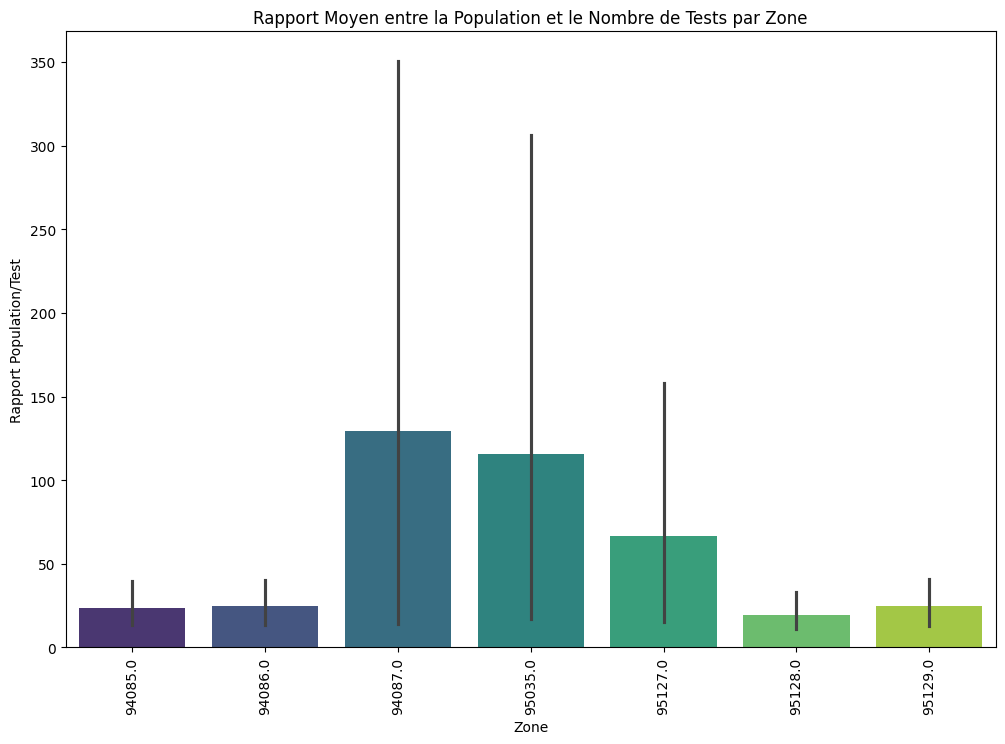

In [17]:

def visualisation_4_2():
    # Calculer le rapport moyen par zone
    dataset['Rapport Population/Test'] = dataset['population'] / dataset['test count']

    # Créer un graphique à barres
    plt.figure(figsize=(12, 8))
    sns.barplot(x='zcta', y='Rapport Population/Test', data=dataset, palette='viridis')
    plt.title('Rapport Moyen entre la Population et le Nombre de Tests par Zone')
    plt.xlabel('Zone')
    plt.ylabel('Rapport Population/Test')
    plt.xticks(rotation=90)

    # Afficher le graphique
    plt.show()
visualisation_4_2()

In [18]:
import pandas as pd

def visualisation_5():# Charger les données depuis le CSV (ajuster le chemin selon votre fichier)


    # Grouper par zone et calculer le nombre total de cas confirmés
    total_cases_by_zone = dataset.groupby('zcta')['case count'].sum().reset_index()

    # Trier par ordre décroissant pour obtenir les zones les plus touchées en premier
    total_cases_by_zone = total_cases_by_zone.sort_values(by='case count', ascending=False)

    # Afficher les 5 zones les plus touchées
    top_5_zones = total_cases_by_zone.head(5)
    print(top_5_zones)

visualisation_5()

      zcta    case count
4  95127.0  11548.678457
3  95035.0   9945.684887
2  94087.0   7380.819936
5  95128.0   7376.845659
1  94086.0   7365.884244


      zcta    case count
4  95127.0  11548.678457
3  95035.0   9945.684887
2  94087.0   7380.819936
5  95128.0   7376.845659
1  94086.0   7365.884244


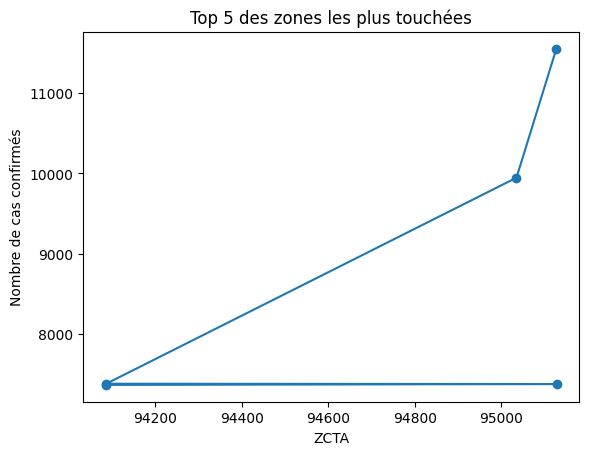

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def visualisation_5():
    # Charger les données depuis le CSV (ajuster le chemin selon votre fichier)
    # dataset = pd.read_csv('votre_fichier.csv')  # Remplacez 'votre_fichier.csv' par le chemin correct

    # Grouper par zone et calculer le nombre total de cas confirmés
    total_cases_by_zone = dataset.groupby('zcta')['case count'].sum().reset_index()

    # Trier par ordre décroissant pour obtenir les zones les plus touchées en premier
    total_cases_by_zone = total_cases_by_zone.sort_values(by='case count', ascending=False)

    # Afficher les 5 zones les plus touchées
    top_5_zones = total_cases_by_zone.head(5)
    print(top_5_zones)

    # Plot un graphe à barres des 5 zones les plus touchées
    plt.plot(top_5_zones['zcta'], top_5_zones['case count'], marker='o', linestyle='-')
    plt.xlabel('ZCTA')
    plt.ylabel('Nombre de cas confirmés')
    plt.title('Top 5 des zones les plus touchées')
    plt.show()

visualisation_5()


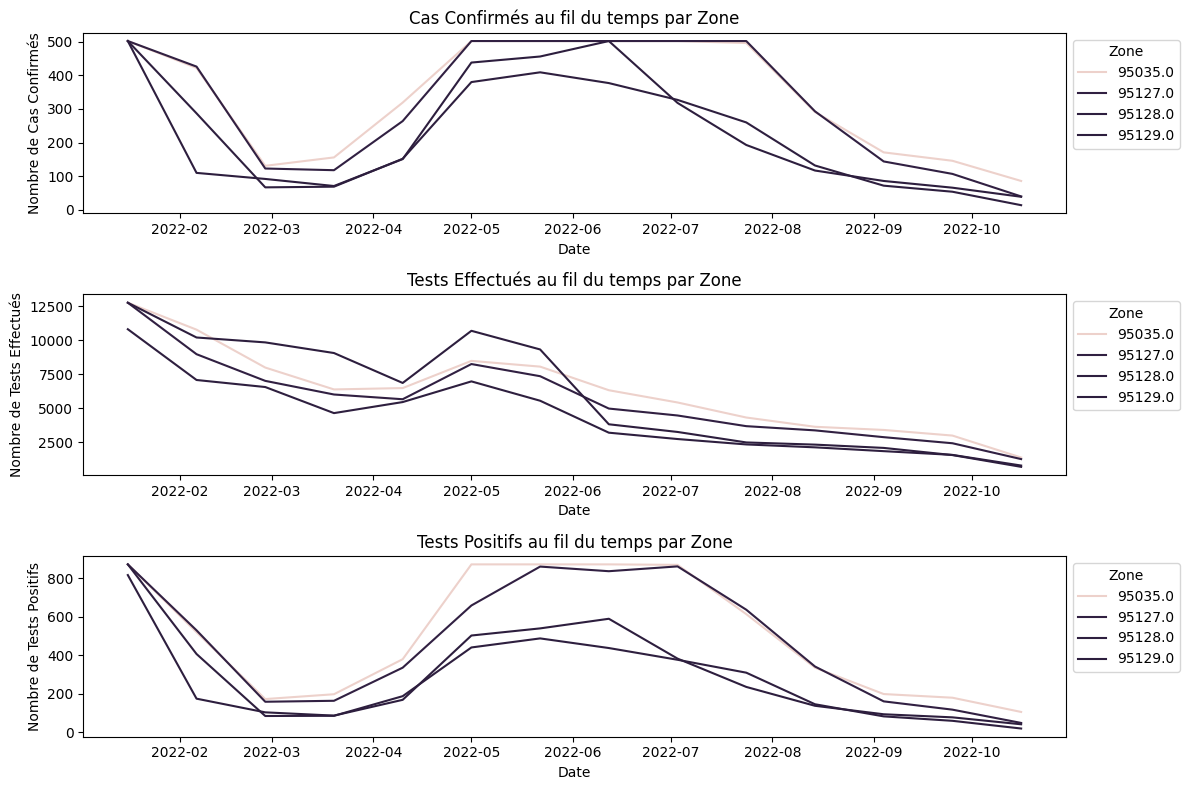

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def visualisation_6(start_date,end_date):

    # Convertir la colonne 'Start date' en datetime si ce n'est pas déjà fait
    dataset['Start date'] = pd.to_datetime(dataset['Start date'], errors='coerce')

    # Choisir la période que vous souhaitez analyser
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Filtrer le DataFrame pour la période sélectionnée
    dataset_period = dataset[(dataset['Start date'] >= start_date) & (dataset['Start date'] <= end_date)]

    # Créer des graphiques pour chaque métrique
    plt.figure(figsize=(12, 8))

    # Cas Confirmés au fil du temps par zone
    plt.subplot(3, 1, 1)
    sns.lineplot(x='Start date', y='case count', hue='zcta', data=dataset_period)
    plt.title('Cas Confirmés au fil du temps par Zone')
    plt.xlabel('Date')
    plt.ylabel('Nombre de Cas Confirmés')
    plt.legend(title='Zone', bbox_to_anchor=(1, 1), loc='upper left')

    # Tests Effectués au fil du temps par zone
    plt.subplot(3, 1, 2)
    sns.lineplot(x='Start date', y='test count', hue='zcta', data=dataset_period)
    plt.title('Tests Effectués au fil du temps par Zone')
    plt.xlabel('Date')
    plt.ylabel('Nombre de Tests Effectués')
    plt.legend(title='Zone', bbox_to_anchor=(1, 1), loc='upper left')

    # Tests Positifs au fil du temps par zone
    plt.subplot(3, 1, 3)
    sns.lineplot(x='Start date', y='positive tests', hue='zcta', data=dataset_period)
    plt.title('Tests Positifs au fil du temps par Zone')
    plt.xlabel('Date')
    plt.ylabel('Nombre de Tests Positifs')
    plt.legend(title='Zone', bbox_to_anchor=(1, 1), loc='upper left')

    # Ajuster l'espacement entre les graphiques
    plt.tight_layout()

    # Afficher les graphiques
    plt.show()

visualisation_6('2022-01-01','2022-12-31')
